In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [2]:
df = pd.read_csv("data/data2023.csv", sep=";", decimal=",")

In [3]:
df.head(18)

,Kabupaten,jumlah_penduduk,total_sampah_ton,jumlah_truk,jumlah_motor,jumlah_tps,total_armada,sampah_perpenduduk,sampah_perarmada,sampah_pertps
0,bogor,5627.02,358,12,11,247,23,0.063622,15.565217,1.449393
1,sukabumi,2802.4,35,14,13,212,27,0.012489,1.296296,0.165094
2,cianjur,2558.14,488.92,2,27,188,29,0.191123,16.859310,2.600638
3,bandung,3721.11,254.46,47,186,210,233,0.068383,1.092103,1.211714
4,garut,2683.67,361.44,9,31,199,40,0.134681,9.036000,1.816281
5,tasikmalaya,1907.05,69,5,2,131,7,0.036182,9.857143,0.526718
6,ciamis,1251.54,72.78,9,24,128,33,0.058152,2.205455,0.568594
7,kuningan,1201.76,30.208,8,3,260,11,25.136467,2746.181818,116.184615
8,cirebon,2360.44,43,22,91,327,113,0.018217,0.380531,0.131498
9,majalengka,1340.62,534,9,2,230,11,0.398323,48.545455,2.321739


In [4]:
df.isna().sum()

Kabupaten             0
jumlah_penduduk       0
total_sampah_ton      0
jumlah_truk           0
jumlah_motor          0
jumlah_tps            0
total_armada          0
sampah_perpenduduk    0
sampah_perarmada      0
sampah_pertps         0
dtype: int64

In [5]:
df = df.dropna()

In [6]:
df = df.replace(",", ".", regex=True)
df.columns = df.columns.str.strip().str.lower()

for col in df.columns:
    if col != 'kabupaten':
        df[col] = pd.to_numeric(df[col], errors='coerce')


df = df.dropna()

In [7]:
features = [
    'jumlah_penduduk',
    'total_sampah_ton',
    'jumlah_truk',
    'jumlah_motor',
    'jumlah_tps',
    'total_armada',
    'sampah_perpenduduk',
    'sampah_perarmada',
    'sampah_pertps'
]


In [8]:
X = df[features]

In [9]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [10]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

df['PC1'] = X_pca[:, 0]
df['PC2'] = X_pca[:, 1]

In [11]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, random_state=42)
cluster = kmeans.fit_predict(X_pca)

df["cluster"] = cluster

In [12]:
df_cluster = df[
    ["kabupaten", "PC1", "PC2", "cluster"]
].sort_values("cluster")

In [13]:
df_cluster.head(18)

,kabupaten,PC1,PC2,cluster
0,bogor,-0.516071,0.000180,0
1,sukabumi,-0.011088,-0.495891,0
2,cianjur,-0.111598,-0.826293,0
4,garut,-0.263619,-0.419582,0
6,ciamis,0.086371,-1.080362,0
5,tasikmalaya,0.335790,-1.537764,0
9,majalengka,0.329020,-1.122473,0
8,cirebon,-0.883326,1.791149,0
12,subang,0.203217,-1.052095,0
13,purwakarta,-0.015380,-1.064193,0


In [14]:
pca.explained_variance_ratio_

array([0.38677112, 0.25304393])

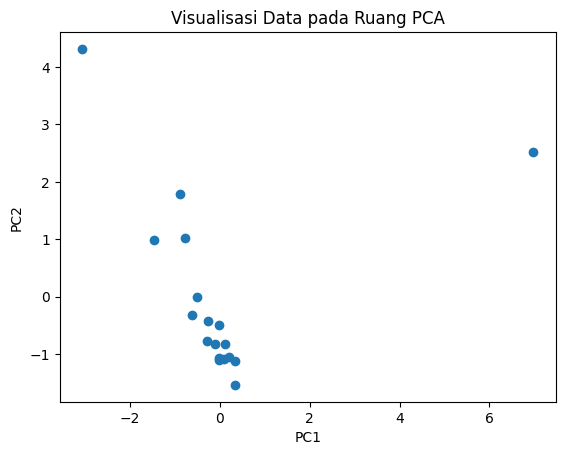

In [15]:
plt.scatter(df['PC1'], df['PC2'])
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("Visualisasi Data pada Ruang PCA")
plt.show()

In [17]:
pickle.dump(kmeans, open("model2023/kmeans_2023.pkl", "wb"))
pickle.dump(scaler, open("model2023/scaler_2023.pkl", "wb"))
pickle.dump(pca, open("model2023/pca_2023.pkl", "wb"))